In [3]:
import csv
import numpy as np

raw_data = open('sunspots.dat','rt')
csv_file = csv.reader(raw_data,delimiter=' ')
csv_list=list(csv_file)              

<IPython.core.display.Javascript object>


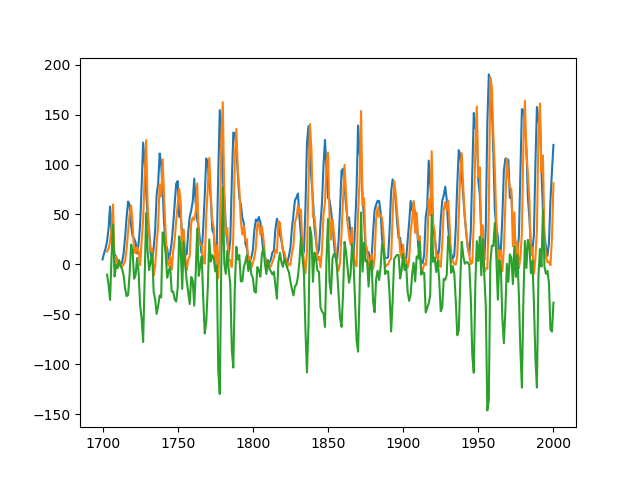

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

year=np.array([])
z=np.array([])
for line in csv_list:
    year=np.append(year,float(line[2])) #I just happen to know this is where the dates are
    z=np.append(z,float(line[4]))       #and the data     
    
plt.figure(0)
plt.plot(year,z)
plt.show()

In [5]:
#linear model of order max lag 8)
maxlag=2
maxz=z.size  #to seperate test and fit data, this should be reduced
X=np.array([z[i:(maxz-maxlag-1)+i] for i in range(0,maxlag)])
X=X.transpose()
y=np.array(z[maxlag+1:maxz])
b=np.dot(np.linalg.pinv(X),y)

In [6]:
#model fit
yp=np.dot(X,b)
plt.plot(year[maxlag+1:],yp)
plt.plot(year[maxlag+1:],yp-y)

In [7]:
#and free run
xinit=z[-maxlag-1:-1]
xi=xinit
nstep=1000
step=0
yp=z[-1]
while step<nstep:
    xp=xi@b
    xi=np.delete(xi,0)
    xi=np.append(xi,xp)
    yp=np.append(yp,xp)
    step+=1

<IPython.core.display.Javascript object>


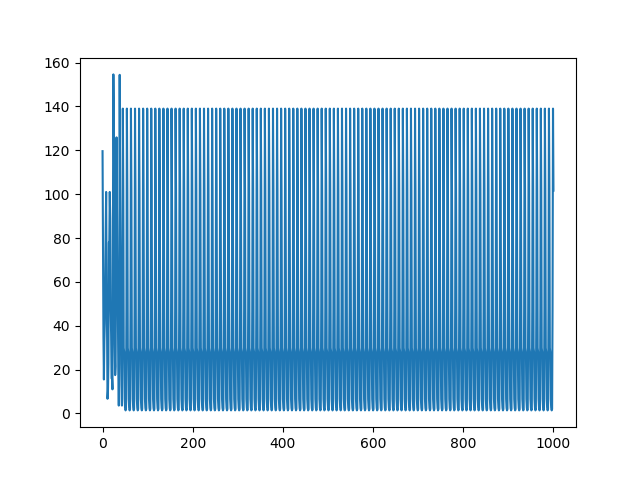

In [14]:
plt.figure(1)
plt.plot(yp)
plt.show()

In [11]:
import math

#now free-rn from a local constant model
#and free run
xinit=z[-maxlag-1:-1]
xi=xinit
nstep=1000
step=0
yp=z[-1]

#distance function
dist=lambda x1, x2: math.sqrt(((x1-x2)**2).sum())

while step<nstep:
    xdm=[dist(xi,xj) for xj in X]
    ind=np.argpartition(xdm,2)[2] #rather neat way of finding the second smallest without doing a full sort
    xp=y[ind]
    xi=np.delete(xi,0)
    xi=np.append(xi,xp)
    yp=np.append(yp,xp)
    step+=1

In [13]:
#now apply the same idea from the linear model - but generate a (larger) set of nonlinear candidates
#in this case, all polynomial combinations of the variables up to order polyk=3 
#(WARNING - there will be (maxlag+1)**polyk of these !)
#we'll just to up to order three here - the rest is an "exercise for the reader"
#thefollowing construction is (perhaps) a little prosaic and not central to the point of this lesson

Xtl=X.transpose().tolist() #easier to see what is happening if we convert the numpy array back to a list of lists
Xtl.insert(0,1)  #prepend xtl with a 1
xp=[np.array(xi)*np.array(xj)*np.array(xk) for xi in Xtl for xj in Xtl for xk in Xtl if Xtl.index(xi)>=Xtl.index(xj)>=Xtl.index(xk) ]
xp.pop(0)
xp=np.array(xp)
xp=xp.transpose() #xp is now the desired numpy array constructed by multipling columns of X together 

In [15]:
#now just repeat the previous linear model - this time with xp
#maxz=z.size  #to seperate test and fit data, this should be reduced
#X=np.array([z[i:(maxz-maxlag-1)+i] for i in range(0,maxlag)])
#X=X.transpose()
#y=np.array(z[maxlag+1:maxz])
b=np.dot(np.linalg.pinv(xp),y)

In [16]:
b

array([-1.42054174e+00,  2.34896278e-02, -3.01444885e-05,  3.45936065e+00,
       -4.15690938e-02, -5.41196741e-05, -8.56977830e-03,  2.15951309e-04,
       -2.02556571e-05])

<IPython.core.display.Javascript object>


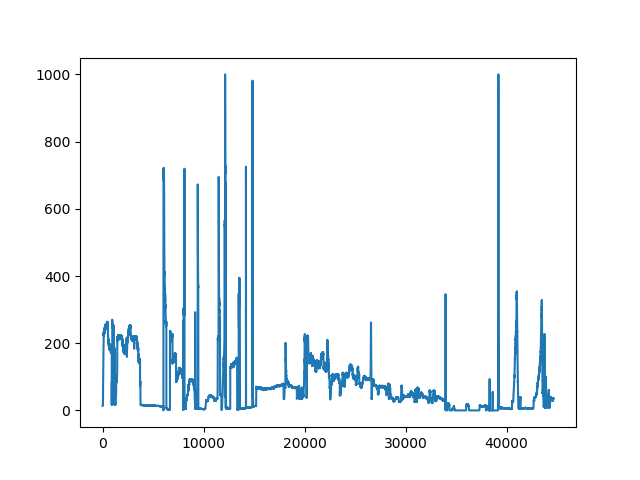

In [19]:
#now try with some "real" data
raw_data = open('gas-furnace.csv','rt')
#raw_data = open('distillate-flow.csv','rt')
csv_file = csv.reader(raw_data,delimiter=',')
csv_list=list(csv_file)              
z=np.array([])
firstline=True
for line in csv_list:
    if firstline:
        firstline=False
    else:
        z=np.append(z,float(line[0]))
    
plt.figure(2)
plt.plot(z)
plt.show()
